In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
df = pd.read_csv('artifical_interview_dataset_new.csv', parse_dates=['BIRTHDATE'], date_parser=dateparse)

# Question 1: Data exploration 

In [2]:
df.head()

,NAME,AUM,PCI,PCII,SEX,ADDRESS,MAIL,BIRTHDATE,NNM,NNM_EXTERNAL,CREDIT,CASH,CHURN
0,Sara Wiley,-0.577082,-1.030537,1.482388,F,"86652 Gutierrez Stream Suite 697\nNew Shane, M...",nicholaswhite@gmail.com,1977-11-12,-2.650731,-3.720392,-0.364590,-1.047985,0
1,James Brown,-0.691180,-0.635986,0.764326,M,"PSC 1483, Box 7248\nAPO AP 10585",kimberlyriggs@gmail.com,1908-01-24,-1.452885,-2.473120,1.192626,-1.693946,0
2,Joshua Ward,-1.249360,-0.780286,0.483667,M,"10675 Jason Row Apt. 455\nKingburgh, WA 71346",webermelissa@yahoo.com,1996-09-14,-0.537228,-1.905635,1.652434,-2.017195,0
3,Camilla Naccari,0.735805,-0.768798,-0.709648,F,"Borgo Ajello 63 Appartamento 75\nRomina sardo,...",matildamalenchini@tiscali.it,1918-05-01,1.074255,2.284963,0.352219,1.207531,0
4,Gerald Landry,2.638680,-1.616039,0.074366,M,"PSC 2169, Box 9024\nAPO AE 81980",whitemichelle@yahoo.com,1968-02-03,0.882823,3.371227,-0.392536,2.679873,0


In [3]:
df.describe()

,AUM,PCI,PCII,NNM,NNM_EXTERNAL,CREDIT,CASH,CHURN
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.000438,-0.999123,0.956933,-0.960328,-1.362976,0.004602,-0.398265,0.024200
std,1.695532,0.654294,0.989057,1.348480,2.209632,1.444776,1.786436,0.153673
min,-6.078461,-4.613093,-5.272113,-7.151946,-9.592358,-5.106234,-5.528323,0.000000
25%,-1.203705,-1.426742,0.329525,-1.870854,-2.873546,-1.062328,-1.794898,0.000000
50%,-0.056638,-1.000084,0.980851,-0.961021,-1.448384,-0.020166,-0.564407,0.000000
75%,1.158666,-0.573567,1.619854,-0.055586,0.084768,1.068157,0.938740,0.000000
max,6.565905,4.277569,4.575373,4.616601,11.499473,5.193619,9.413039,1.000000


In [4]:
df[df.duplicated(keep=False)]

,NAME,AUM,PCI,PCII,SEX,ADDRESS,MAIL,BIRTHDATE,NNM,NNM_EXTERNAL,CREDIT,CASH,CHURN


In [5]:
df_identity = df[["NAME", "BIRTHDATE"]]
df_identity[df_identity.duplicated(keep=False)]

,NAME,BIRTHDATE


In [6]:
pd.concat(g for _, g in df.groupby("BIRTHDATE") if len(g) > 1)

,NAME,AUM,PCI,PCII,SEX,ADDRESS,MAIL,BIRTHDATE,NNM,NNM_EXTERNAL,CREDIT,CASH,CHURN
2616,Hans-Christian Ernst B.Sc.,1.047563,-1.252349,1.302992,M,Annelene-Schäfer-Allee 9/4\n94812 Riesa,muelichenerdmute@aol.de,1905-09-30,-2.354335,-1.835298,-1.026819,0.714089,0
15989,Jacqueline Jones,3.967801,-2.993943,1.721186,F,"67461 Mccarthy Spurs\nWest Susanfort, WI 78305",lambbenjamin@hotmail.com,1905-09-30,-1.535578,1.622509,-2.575942,4.139794,0
23142,Nicolai Butte B.Eng.,-0.742609,-0.375627,1.285047,M,Säuberlichallee 2/8\n84192 Lüdinghausen,jesselnora@aol.de,1905-09-30,-1.193056,-2.624919,0.179227,-1.542656,0
24708,Prof. Adina Hartung B.Sc.,-2.263134,-0.350300,0.364864,F,Haaseallee 0/4\n07220 Hannoversch Münden,zadolph@gmail.com,1905-09-30,-1.261306,-3.177640,-0.101711,-1.629475,0
7238,Margaret Nohlmans,2.976423,-1.874882,0.892029,F,Trubinstraße 00\n62441 Chemnitz,ryszardfechner@gmx.de,1905-10-01,-0.798789,1.661292,-1.223448,2.805487,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,Patricia Rodrigues-Breton,3.368942,-2.057055,1.667115,F,avenue de Bonnet\n03734 Sainte Thierry,gpires@bouygtel.fr,2021-09-24,0.464269,2.635485,-1.794670,3.008837,0
6531,Erika Mantegna,2.795063,-1.958579,1.626509,F,"Via Beccaria 5 Piano 2\nNicolò terme, 56695 Ar...",caterinafantozzi@gmail.com,2021-09-24,-0.399767,1.410342,-1.940225,2.661008,0
14171,Alberto Venceslás Montesinos Puerta,-1.188585,-0.483311,1.275932,M,"Alameda Ileana Ribas 3\nCórdoba, 08294",acarrera@gmail.com,2021-09-24,-1.466384,-3.072813,-0.805885,-1.130289,0
15902,Stacey Gonzalez,0.220128,-0.315605,-0.747436,F,33877 Butler Extensions Apt. 398\nSouth Philip...,ikennedy@yahoo.com,2021-09-24,1.378422,2.048721,0.358526,0.726102,0


In [7]:
df[['CHURN']].value_counts()

CHURN
0        24395
1          605
dtype: int64

<AxesSubplot:>

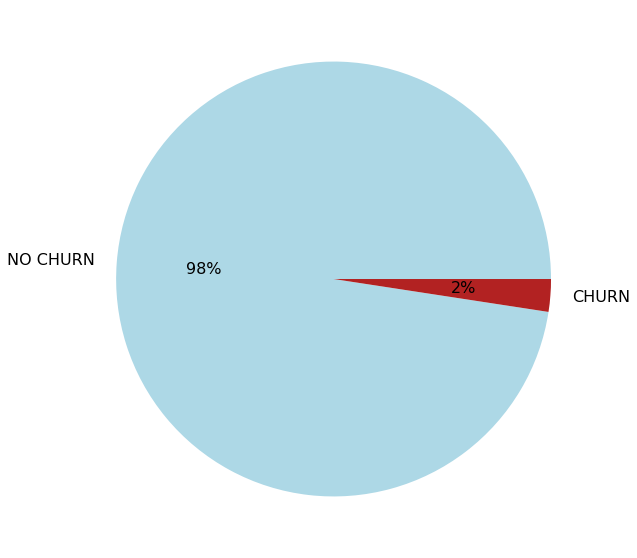

In [8]:
df[['CHURN']].value_counts().plot(y='CHURN', kind='pie', figsize=(10, 10), colors=['LightBlue', 'FireBrick'], autopct='%1.0f%%', labels=['NO CHURN', 'CHURN'], ylabel='', fontsize=16)

In [9]:
now = pd.Timestamp('now')
df['AGE'] = (now - df['BIRTHDATE']).astype('<m8[Y]')
df.head()

,NAME,AUM,PCI,PCII,SEX,ADDRESS,MAIL,BIRTHDATE,NNM,NNM_EXTERNAL,CREDIT,CASH,CHURN,AGE
0,Sara Wiley,-0.577082,-1.030537,1.482388,F,"86652 Gutierrez Stream Suite 697\nNew Shane, M...",nicholaswhite@gmail.com,1977-11-12,-2.650731,-3.720392,-0.364590,-1.047985,0,44.0
1,James Brown,-0.691180,-0.635986,0.764326,M,"PSC 1483, Box 7248\nAPO AP 10585",kimberlyriggs@gmail.com,1908-01-24,-1.452885,-2.473120,1.192626,-1.693946,0,114.0
2,Joshua Ward,-1.249360,-0.780286,0.483667,M,"10675 Jason Row Apt. 455\nKingburgh, WA 71346",webermelissa@yahoo.com,1996-09-14,-0.537228,-1.905635,1.652434,-2.017195,0,25.0
3,Camilla Naccari,0.735805,-0.768798,-0.709648,F,"Borgo Ajello 63 Appartamento 75\nRomina sardo,...",matildamalenchini@tiscali.it,1918-05-01,1.074255,2.284963,0.352219,1.207531,0,103.0
4,Gerald Landry,2.638680,-1.616039,0.074366,M,"PSC 2169, Box 9024\nAPO AE 81980",whitemichelle@yahoo.com,1968-02-03,0.882823,3.371227,-0.392536,2.679873,0,54.0


array([[<AxesSubplot:title={'center':'AGE'}>]], dtype=object)

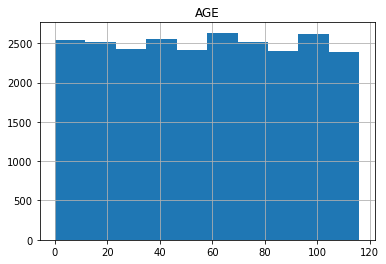

In [10]:
df.hist(column='AGE', bins=10)

array([[<AxesSubplot:title={'center':'AGE'}>]], dtype=object)

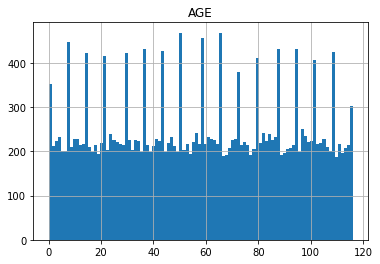

In [11]:
df.hist(column='AGE', bins=100)

<AxesSubplot:xlabel='CHURN', ylabel='CASH'>

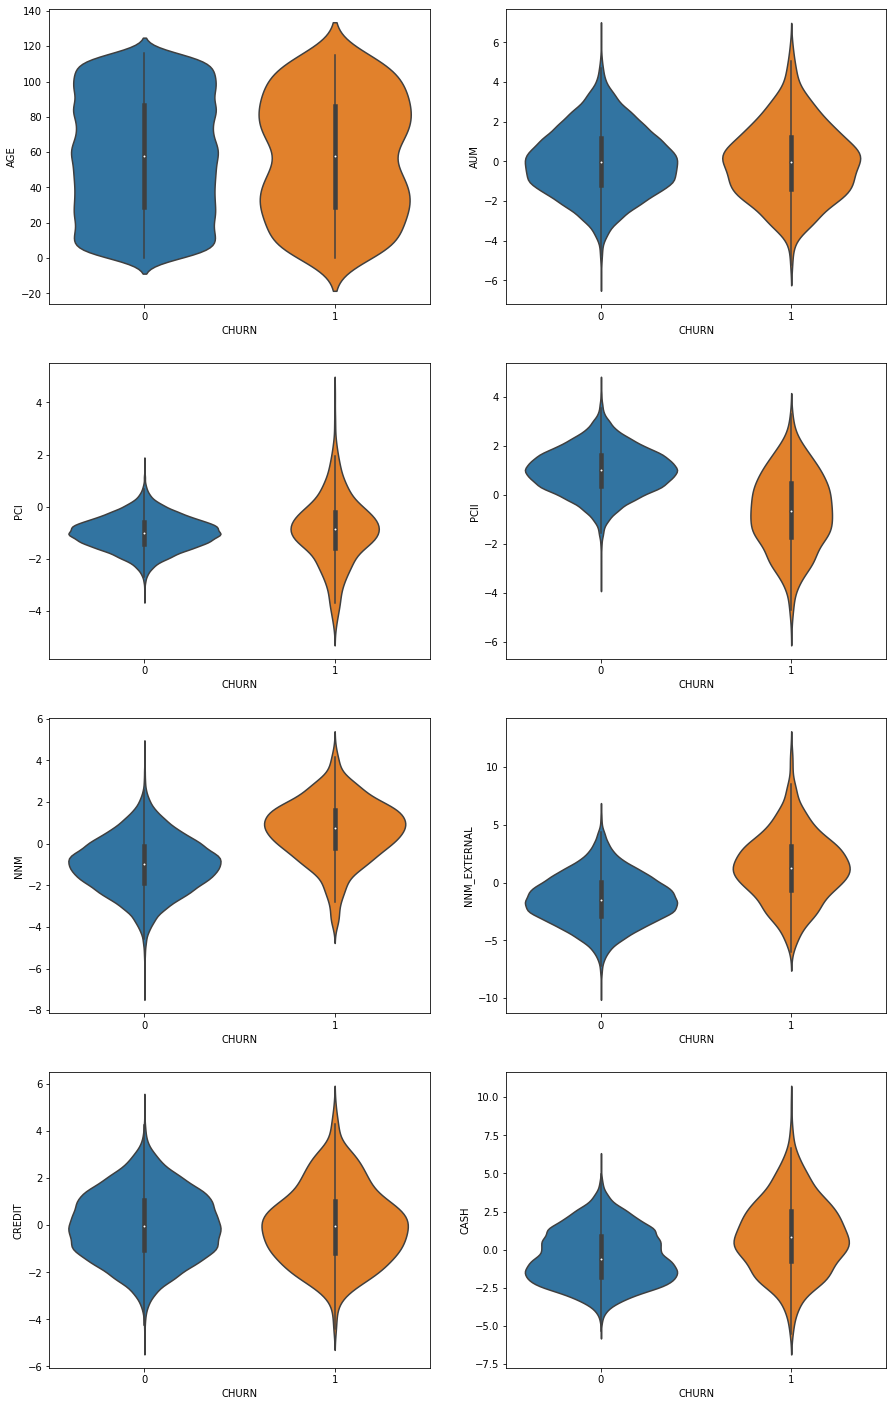

In [12]:
f, axes = plt.subplots(4, 2, figsize=(15,25))

sns.violinplot(x="CHURN", y="AGE", data=df, ax=axes[0, 0])
sns.violinplot(x="CHURN", y="AUM", data=df, ax=axes[0, 1])
sns.violinplot(x="CHURN", y="PCI", data=df, ax=axes[1, 0])
sns.violinplot(x="CHURN", y="PCII", data=df, ax=axes[1, 1])
sns.violinplot(x="CHURN", y="NNM", data=df, ax=axes[2, 0])
sns.violinplot(x="CHURN", y="NNM_EXTERNAL", data=df, ax=axes[2, 1])
sns.violinplot(x="CHURN", y="CREDIT", data=df, ax=axes[3, 0])
sns.violinplot(x="CHURN", y="CASH", data=df, ax=axes[3, 1])


In [13]:
df_gender = df.pivot_table(values='CHURN', columns='SEX', aggfunc='sum')
df_gender

SEX,F,M
CHURN,315,290


In [14]:
 df_gender/605*100

SEX,F,M
CHURN,52.066116,47.933884


In [15]:
df = pd.get_dummies(df, columns=['SEX'], drop_first=True)

<AxesSubplot:>

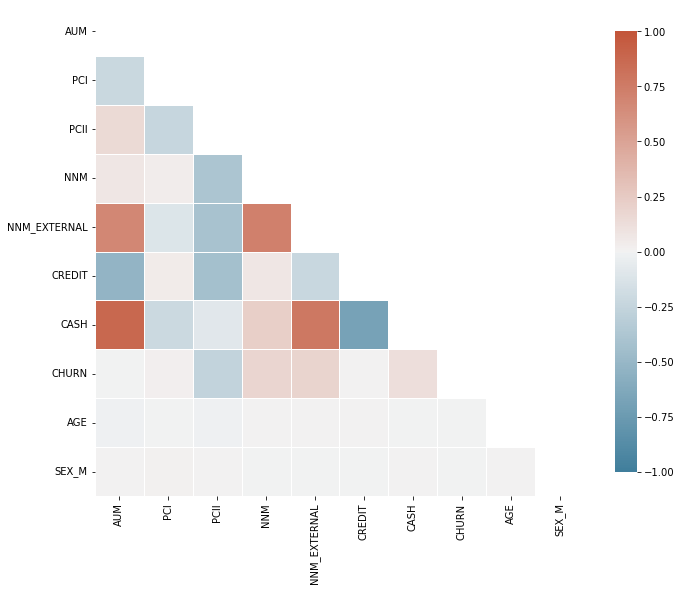

In [16]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9})

Text(0.5, 0, 'PCII')

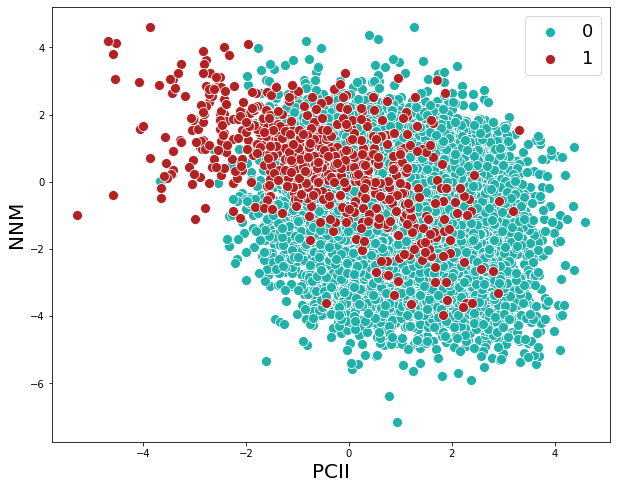

In [17]:
df_neg = df.loc[df['CHURN'] == 0]
df_pos = df.loc[df['CHURN'] == 1]

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df_neg[['PCII', 'NNM', 'CHURN']], x='PCII', y='NNM', color='lightseagreen', s=100)
sns.scatterplot(data=df_pos[['PCII', 'NNM', 'CHURN']], x='PCII', y='NNM', color='firebrick', s=100)
plt.legend(labels=['0', '1'], fontsize=18)
ax.set_ylabel(ylabel='NNM', fontsize=20)
ax.set_xlabel(xlabel='PCII', fontsize=20)

# Question 2: Modelling


In [18]:
X = df[['AUM', 'PCI', 'PCII', 'NNM', 'NNM_EXTERNAL', 'CREDIT', 'CASH']] # all columns excluding name, email, address, birthdate, age, & sex
y = df[['CHURN']]

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, precision_score, recall_score, f1_score, classification_report

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

CHURN    0.0242
dtype: float64
CHURN    0.0242
dtype: float64


## Naive model

In [21]:
y_pred = np.ones((len(y_test)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4879
           1       0.02      1.00      0.05       121

    accuracy                           0.02      5000
   macro avg       0.01      0.50      0.02      5000
weighted avg       0.00      0.02      0.00      5000



/Users/oliverangelil/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oliverangelil/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oliverangelil/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Baseline model

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_train, y_train.values.ravel())
y_pred = DTC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4879
           1       0.53      0.51      0.52       121

    accuracy                           0.98      5000
   macro avg       0.76      0.75      0.75      5000
weighted avg       0.98      0.98      0.98      5000



Index(['AUM', 'PCI', 'PCII', 'NNM', 'NNM_EXTERNAL', 'CREDIT', 'CASH'], dtype='object')


[Text(0.5, 0.875, 'X[2] <= -1.477\ngini = 0.047\nsamples = 20000\nvalue = [19516, 484]'),
 Text(0.25, 0.625, 'X[6] <= 0.372\ngini = 0.465\nsamples = 250\nvalue = [92, 158]'),
 Text(0.125, 0.375, 'X[5] <= 0.868\ngini = 0.094\nsamples = 81\nvalue = [77, 4]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[5] <= 0.673\ngini = 0.162\nsamples = 169\nvalue = [15, 154]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[1] <= 1.219\ngini = 0.032\nsamples = 19750\nvalue = [19424, 326]'),
 Text(0.625, 0.375, 'X[1] <= -3.045\ngini = 0.03\nsamples = 19723\nvalue = [19419, 304]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[3] <= -0.197\ngini = 0.302\nsamples = 27\nvalue = [5, 22]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

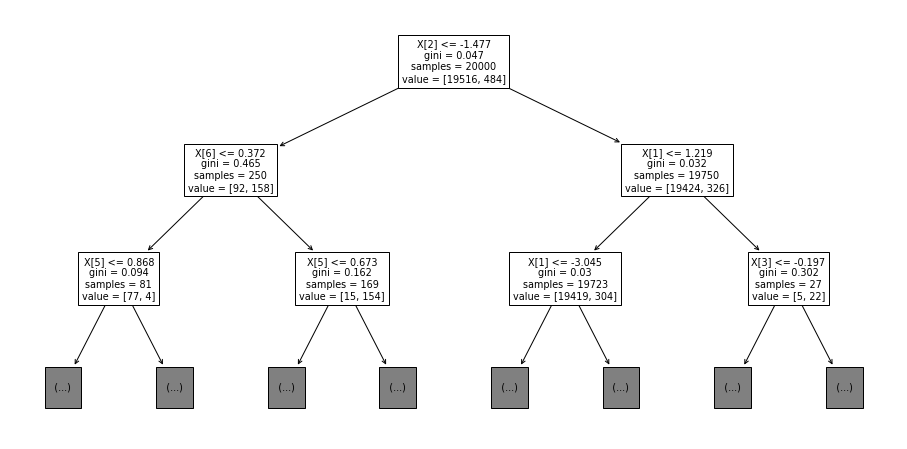

In [23]:
fig, ax = plt.subplots(figsize=(16, 8))
print(X_train.columns)
plot_tree(DTC, ax = ax, max_depth=2)

## Baseline model (CV)

In [24]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_validate(DTC, X=X, y=y.values.ravel(), cv=cv, scoring=('recall', 'precision', 'f1'))

{'fit_time': array([0.29361105, 0.32321191, 0.26787615, 0.25972319, 0.29124784]),
 'score_time': array([0.00657082, 0.00630522, 0.00669694, 0.00632787, 0.00637817]),
 'test_recall': array([0.49586777, 0.49586777, 0.5785124 , 0.56198347, 0.62809917]),
 'test_precision': array([0.58252427, 0.45801527, 0.60869565, 0.57142857, 0.54676259]),
 'test_f1': array([0.53571429, 0.47619048, 0.59322034, 0.56666667, 0.58461538])}

## Upsampling with SMOTE

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

print(Counter(y_train.values.ravel()))

# transform the dataset
oversample = SMOTE(random_state=42, sampling_strategy=1)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

# summarize the new class distribution
print(Counter(y_train_smote.values.ravel()))

Counter({0: 19516, 1: 484})
Counter({0: 19516, 1: 19516})


In [26]:
DTC.fit(X_train_smote, y_train_smote.values.ravel())
y_pred = DTC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4879
           1       0.25      0.61      0.35       121

    accuracy                           0.95      5000
   macro avg       0.62      0.78      0.66      5000
weighted avg       0.97      0.95      0.96      5000



## Upsampling with SMOTE (CV)

In [27]:
from imblearn.pipeline import Pipeline

over = SMOTE(random_state=42, sampling_strategy=1)
steps = [('over', over), ('model', DTC)]
pipeline = Pipeline(steps=steps)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_validate(pipeline, X=X, y=y.values.ravel(), cv=cv, scoring=('recall', 'precision', 'f1'))

{'fit_time': array([0.37952209, 0.35619092, 0.33603191, 0.32659888, 0.34261203]),
 'score_time': array([0.00697279, 0.00664687, 0.00682497, 0.00672197, 0.00670075]),
 'test_recall': array([0.56198347, 0.61983471, 0.62809917, 0.6446281 , 0.6446281 ]),
 'test_precision': array([0.23208191, 0.26041667, 0.24918033, 0.23283582, 0.22674419]),
 'test_f1': array([0.32850242, 0.36674817, 0.35680751, 0.34210526, 0.33548387])}

## All together

In [28]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score, confusion_matrix

def rf_pipeline(X_train, y_train):
    param_grid = {'n_estimators': [100],
                     'max_depth':[None],
                     'min_samples_split': [2, 3],
                     'min_samples_leaf': [1, 2]}

    RF = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced')
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    grid = GridSearchCV(RF, param_grid=param_grid, cv=cv, scoring='f1')
    grid.fit(X_train, y_train.values.ravel())
    
    
    y_proba = grid.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    
    y_pred = grid.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_proba>0.5)
    
    return precision, recall, f1, cm


def lr_pipeline(X_train, y_train):
    param_grid = {'C': [0.0001, 0.001, 0.01, 0.1]}

    LR = LogisticRegression(n_jobs=-1, random_state=42, class_weight='balanced')
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    grid = GridSearchCV(LR, param_grid=param_grid, cv=cv, scoring='f1')
    grid.fit(X_train, y_train.values.ravel())
    
    y_pred = grid.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    
    y_proba = grid.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    return precision, recall, f1


def smote_sampling(over_sampling_strategy, under_sampling_strategy):
    # define pipeline
    over = SMOTE(sampling_strategy=over_sampling_strategy, random_state=42, k_neighbors=4)
    under = RandomUnderSampler(sampling_strategy=under_sampling_strategy, random_state=42)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)

    X_train_smote, y_train_smote = pipeline.fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote

In [29]:
precision_base_rf, recall_base_rf, f1_base_rf, cm = rf_pipeline(X_train, y_train)
precision_base_lr, recall_base_lr, f1_base_lr = lr_pipeline(X_train, y_train)

X_train_smote_up, y_train_smote_up = smote_sampling(1, 1) # {0: 19508, 1: 492} --> {0: 19508, 1: 19508}
precision_up_rf, recall_up_rf, f1_up_rf, _ = rf_pipeline(X_train_smote_up, y_train_smote_up)
precision_up_lr, recall_up_lr, f1_up_lr = lr_pipeline(X_train_smote_up, y_train_smote_up)

X_train_smote_up_down, y_train_smote_up_down = smote_sampling(0.1, 0.5) # {0: 19508, 1: 492} --> {0: 3900, 1: 1950}
precision_up_down_rf, recall_up_down_rf, f1_up_down_rf, _ = rf_pipeline(X_train_smote_up_down, y_train_smote_up_down)
precision_up_down_lr, recall_up_down_lr, f1_up_down_lr = lr_pipeline(X_train_smote_up_down, y_train_smote_up_down)

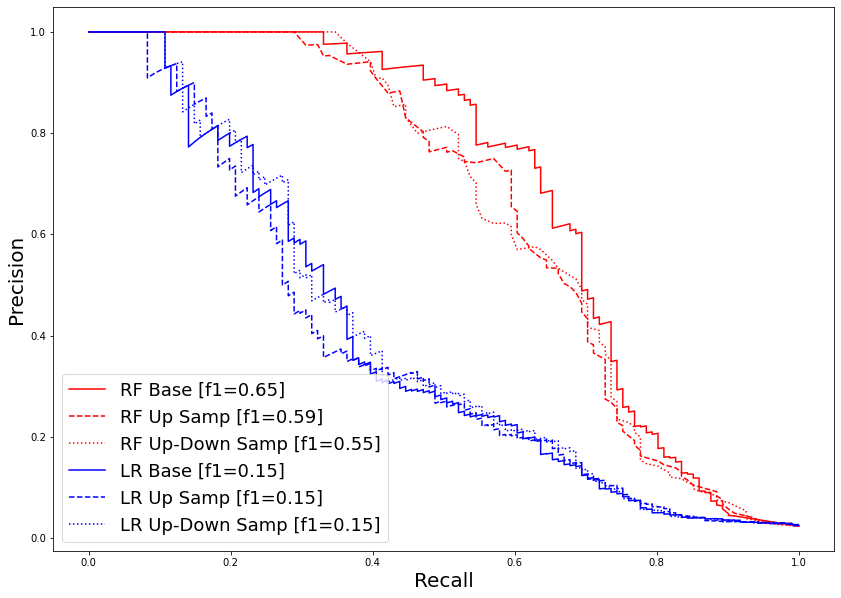

In [30]:
fig, ax = plt.subplots(figsize=(14, 10))
plt.plot(recall_base_rf, precision_base_rf, linestyle='-', label='RF Base [f1=' + str(round(f1_base_rf,2)) + ']', color='r')
plt.plot(recall_up_rf, precision_up_rf, linestyle='--', label='RF Up Samp [f1=' + str(round(f1_up_rf,2)) + ']', color='r')
plt.plot(recall_up_down_rf, precision_up_down_rf, linestyle=':', label='RF Up-Down Samp [f1=' + str(round(f1_up_down_rf,2)) + ']', color='r')

plt.plot(recall_base_lr, precision_base_lr, linestyle='-', label='LR Base [f1=' + str(round(f1_base_lr,2)) + ']', color='b')
plt.plot(recall_up_lr, precision_up_lr, linestyle='--', label='LR Up Samp [f1=' + str(round(f1_up_lr,2)) + ']', color='b')
plt.plot(recall_up_down_lr, precision_up_down_lr, linestyle=':', label='LR Up-Down Samp [f1=' + str(round(f1_up_down_lr,2)) + ']', color='b')

plt.xlabel('Recall', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.legend(fontsize=18)

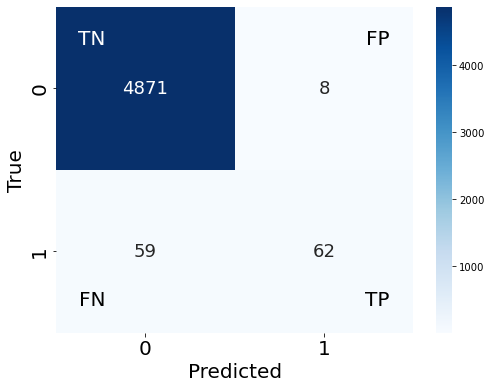

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 18})
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('True', fontsize=20)

ax.text(0.1, 0.9,'TN', ha='center', va='center', transform=ax.transAxes, color='w', fontsize=20)
ax.text(0.1, 0.1,'FN', ha='center', va='center', transform=ax.transAxes, color='k', fontsize=20)
ax.text(0.9, 0.9,'FP', ha='center', va='center', transform=ax.transAxes, color='k', fontsize=20)
ax.text(0.9, 0.1,'TP', ha='center', va='center', transform=ax.transAxes, color='k', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)


In [32]:
P = 89/(89+154)
R = 89/(89+32)
print(P)
print(R)

0.3662551440329218
0.7355371900826446


In [33]:
F1 = 2 * (P * R) / (P + R)
print(F1)

0.48901098901098905
